In [ ]:
import requests
import csv
from datetime import datetime

API_KEY = 'c29a1583e9d54bf180f180516250106'
CITIES = ['Bangalore', 'Mysore']
URL_TEMPLATE = 'https://api.weatherapi.com/v1/current.json?key={}&q={}'

# Prepare list for weather data
weather_data = []

for city in CITIES:
    url = URL_TEMPLATE.format(API_KEY, city)
    response = requests.get(url)
    data = response.json()

    if response.status_code == 200:
        current = data['current']
        city_data = {
            'City': city,
            'Date': datetime.now().strftime('%Y-%m-%d'),
            'Time': datetime.now().strftime('%H:%M:%S'),
            'Temperature (°C)': current['temp_c'],
            'Humidity (%)': current['humidity'],
            'Condition': current['condition']['text'],
            'Wind Speed (kph)': current['wind_kph']
        }
        weather_data.append(city_data)

        # ✅ Print weather data
        print(f"\n📍 Weather in {city}")
        for key, value in city_data.items():
            print(f"{key}: {value}")
    else:
        print(f"❌ Error fetching data for {city}: {data.get('error', {}).get('message')}")

# Save the data to CSV and print size (rows x cols)
if weather_data:
    filename = 'live_weather_data.csv'
    fieldnames = weather_data[0].keys()
    with open(filename, mode='w', newline='') as file:
        writer = csv.DictWriter(file, fieldnames=fieldnames)
        writer.writeheader()
        writer.writerows(weather_data)

    num_rows = len(weather_data)
    num_cols = len(fieldnames)

    print(f"\n✅ Weather data saved to {filename}")
    print(f"📊 Data Shape: {num_rows} rows × {num_cols} columns")



📍 Weather in Bangalore
City: Bangalore
Date: 2025-07-17
Time: 18:28:50
Temperature (°C): 21.3
Humidity (%): 100
Condition: Light rain
Wind Speed (kph): 18.0

📍 Weather in Mysore
City: Mysore
Date: 2025-07-17
Time: 18:28:50
Temperature (°C): 21.2
Humidity (%): 91
Condition: Overcast
Wind Speed (kph): 17.3

✅ Weather data saved to live_weather_data.csv
📊 Data Shape: 2 rows × 7 columns


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import files
files.download('live_weather_data.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:

import pandas as pd
import zipfile

# Define base path
base_path = "/content/drive/My Drive"  # or add "/your_folder" if files are inside a folder

# Load CSVs
bengaluru_aqi = pd.read_csv(f"{base_path}/Bengaluru_AQIBulletins.csv")
mysuru_aqi = pd.read_csv(f"{base_path}/Mysuru_AQIBulletins.csv")

df = pd.read_csv("/content/drive/My Drive/AQI_Weather_Analyser_Project/DATA/final_AQI.zip")

# Step 5: Print shape and preview
print("✅ final_AQI shape:", df.shape)
print(df.head())


print("\n✅ mysuru_aqi shape:", mysuru_aqi.shape)
print(mysuru_aqi.head())

print("\n✅ bengaluru_aqi shape:", bengaluru_aqi.shape)
print(bengaluru_aqi.head())




✅ final_AQI shape: (1332059, 52)
                   Start_TS                  End_Date  PM25  PM10    NO  \
0  2010-01-01T00:00:00.000Z  2010-01-01T01:00:00.000Z   0.0   0.0  3.51   
1  2010-01-01T00:00:00.000Z  2010-01-01T01:00:00.000Z   0.0   0.0  0.85   
2  2010-01-01T01:00:00.000Z  2010-01-01T02:00:00.000Z   0.0   0.0  5.57   
3  2010-01-01T01:00:00.000Z  2010-01-01T02:00:00.000Z   0.0   0.0  1.19   
4  2010-01-01T02:00:00.000Z  2010-01-01T03:00:00.000Z   0.0   0.0  5.69   

     NO2    NOX    NH3   SO2    CO  ...  Rolling_PM10_max_7d  \
0  17.84  21.26   0.00  1.36  0.48  ...                  0.0   
1  21.07  21.91  32.51  4.30  0.45  ...                  0.0   
2  14.71  20.28   0.00  1.23  0.49  ...                  0.0   
3  20.41  21.60  31.99  1.22  0.35  ...                  0.0   
4  14.18  19.87   0.00  1.09  0.38  ...                  0.0   

   Rolling_NO2_mean  Lag_NO2_1h  Rolling_NO2_max_7d  Rolling_CO_mean  \
0         17.840000         NaN               21.07        

In [ ]:
# Print columns and their count
print(f"Number of columns: {len(df.columns)}")
print("Columns:")
print(df.columns.tolist())

Number of columns: 52
Columns:
['Start_TS', 'End_Date', 'PM25', 'PM10', 'NO', 'NO2', 'NOX', 'NH3', 'SO2', 'CO', 'OZONE', 'BENZENE', 'TOLUENE', 'ETH_BENZENE', 'MP_XYLENE', 'O_XYLENE', 'TEMP_C', 'RH', 'WS', 'WD', 'SR', 'BP', 'VWS', 'PM_RATIO', 'NOX_TO_NO2', 'PM25_WIND_SCALED', 'HUMIDITY_TEMP_INDEX', 'AQI_PM25', 'AQI_PM10', 'AQI_NO2', 'AQI_SO2', 'AQI_CO', 'AQI_OZONE', 'AQI_NH3', 'AQI_CPCB', 'AQI_Category', 'Start_TS_unix', 'Rolling_PM25_mean', 'Lag_PM25_1h', 'Rolling_Temperature_max', 'Rolling_PM10_mean', 'Lag_PM10_1h', 'Rolling_PM10_max_7d', 'Rolling_NO2_mean', 'Lag_NO2_1h', 'Rolling_NO2_max_7d', 'Rolling_CO_mean', 'Lag_CO_1h', 'Rolling_CO_max_7d', 'Rolling_SO2_mean', 'Lag_SO2_1h', 'Rolling_SO2_max_7d']


In [ ]:
# Rename weather_data list to DataFrame
live_weather_df = pd.DataFrame(weather_data)

# Convert date columns to datetime
live_weather_df['Date'] = pd.to_datetime(live_weather_df['Date'])
bengaluru_aqi['date'] = pd.to_datetime(bengaluru_aqi['date'])
mysuru_aqi['date'] = pd.to_datetime(mysuru_aqi['date'])

# Standardize City names
bengaluru_aqi['City'] = 'Bangalore'
mysuru_aqi['City'] = 'Mysore'

# Combine AQI dataframes
aqi_df = pd.concat([bengaluru_aqi, mysuru_aqi], ignore_index=True)

# Merge live weather data with AQI data on City and Date
merged_df = pd.merge(live_weather_df, aqi_df, left_on=['City', 'Date'], right_on=['City', 'date'], how='left')


In [ ]:
def get_weather_emoji(condition):
    condition = condition.lower()
    if 'clear' in condition:
        return '☀️'
    elif 'cloud' in condition:
        return '☁️'
    elif 'rain' in condition:
        return '🌧️'
    elif 'storm' in condition:
        return '⛈️'
    elif 'snow' in condition:
        return '❄️'
    else:
        return '🌈'

# Example usage
merged_df['Weather_Emoji'] = merged_df['Condition'].apply(get_weather_emoji)


In [ ]:
'''import plotly.express as px

# Your DataFrame: bengaluru_aqi
fig = px.line(
    bengaluru_aqi,
    x='date',
    y='Index Value',
    title='Bangalore AQI Over Time (Historical)',
    markers=True
)

# Show interactive plot
fig.show()

# Save static PNG
fig.write_image("bangalore_aqi_plot.png", width=1000, height=600)'''


'import plotly.express as px\n\n# Your DataFrame: bengaluru_aqi\nfig = px.line(\n    bengaluru_aqi,\n    x=\'date\',\n    y=\'Index Value\',\n    title=\'Bangalore AQI Over Time (Historical)\',\n    markers=True\n)\n\n# Show interactive plot\nfig.show()\n\n# Save static PNG\nfig.write_image("bangalore_aqi_plot.png", width=1000, height=600)'

In [ ]:
'''from google.colab import files
files.download('/content/bangalore_aqi_plot.png')'''


"from google.colab import files\nfiles.download('/content/bangalore_aqi_plot.png')"

In [ ]:
import pandas as pd

# Assuming df is your loaded DataFrame from final_AQI.zip
df['Start_TS'] = pd.to_datetime(df['Start_TS'])
df['End_Date'] = pd.to_datetime(df['End_Date'])

# Check conversion
print(df[['Start_TS', 'End_Date']].head())


                   Start_TS                  End_Date
0 2010-01-01 00:00:00+00:00 2010-01-01 01:00:00+00:00
1 2010-01-01 00:00:00+00:00 2010-01-01 01:00:00+00:00
2 2010-01-01 01:00:00+00:00 2010-01-01 02:00:00+00:00
3 2010-01-01 01:00:00+00:00 2010-01-01 02:00:00+00:00
4 2010-01-01 02:00:00+00:00 2010-01-01 03:00:00+00:00


In [ ]:
derived_cols = [col for col in df.columns if col.startswith(('Rolling_', 'Lag_'))] + ['AQI_CPCB', 'AQI_Category']

missing_counts = df[derived_cols].isnull().sum()
print(missing_counts)


Rolling_PM25_mean          0
Lag_PM25_1h                1
Rolling_Temperature_max    0
Rolling_PM10_mean          0
Lag_PM10_1h                1
Rolling_PM10_max_7d        0
Rolling_NO2_mean           0
Lag_NO2_1h                 1
Rolling_NO2_max_7d         0
Rolling_CO_mean            0
Lag_CO_1h                  1
Rolling_CO_max_7d          0
Rolling_SO2_mean           0
Lag_SO2_1h                 1
Rolling_SO2_max_7d         0
AQI_CPCB                   0
AQI_Category               0
dtype: int64


In [ ]:
df[derived_cols] = df[derived_cols].ffill().fillna(0)



In [ ]:
lag_cols = ['Lag_PM25_1h', 'Lag_PM10_1h', 'Lag_NO2_1h', 'Lag_CO_1h', 'Lag_SO2_1h']

# Drop rows with NaN in any lag column
df_clean = df.dropna(subset=lag_cols)

print(f"Shape before dropping: {df.shape}")
print(f"Shape after dropping: {df_clean.shape}")


Shape before dropping: (1332059, 52)
Shape after dropping: (1332059, 52)


In [ ]:
df.nunique().sort_values()  # to check unique values per column


,0
AQI_Category,6
AQI_CPCB,501
Rolling_PM10_max_7d,936
Rolling_Temperature_max,1051
Rolling_CO_max_7d,1918
Rolling_SO2_max_7d,1970
Rolling_NO2_max_7d,1997
AQI_CO,4461
ETH_BENZENE,5142
Lag_CO_1h,9272


In [ ]:
 print(df.columns.tolist())


['Start_TS', 'End_Date', 'PM25', 'PM10', 'NO', 'NO2', 'NOX', 'NH3', 'SO2', 'CO', 'OZONE', 'BENZENE', 'TOLUENE', 'ETH_BENZENE', 'MP_XYLENE', 'O_XYLENE', 'TEMP_C', 'RH', 'WS', 'WD', 'SR', 'BP', 'VWS', 'PM_RATIO', 'NOX_TO_NO2', 'PM25_WIND_SCALED', 'HUMIDITY_TEMP_INDEX', 'AQI_PM25', 'AQI_PM10', 'AQI_NO2', 'AQI_SO2', 'AQI_CO', 'AQI_OZONE', 'AQI_NH3', 'AQI_CPCB', 'AQI_Category', 'Start_TS_unix', 'Rolling_PM25_mean', 'Lag_PM25_1h', 'Rolling_Temperature_max', 'Rolling_PM10_mean', 'Lag_PM10_1h', 'Rolling_PM10_max_7d', 'Rolling_NO2_mean', 'Lag_NO2_1h', 'Rolling_NO2_max_7d', 'Rolling_CO_mean', 'Lag_CO_1h', 'Rolling_CO_max_7d', 'Rolling_SO2_mean', 'Lag_SO2_1h', 'Rolling_SO2_max_7d']


In [ ]:

import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [ ]:
features = ['PM25', 'PM10', 'NO2', 'CO', 'SO2', 'OZONE', 'TEMP_C', 'RH', 'WS', 'WD']
target = 'AQI_CPCB'  # or 'PM25' if you're directly predicting PM2.5

# Drop rows with NA in selected columns
df_model = df[features + [target]].dropna()

X = df_model[features]
y = df_model[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

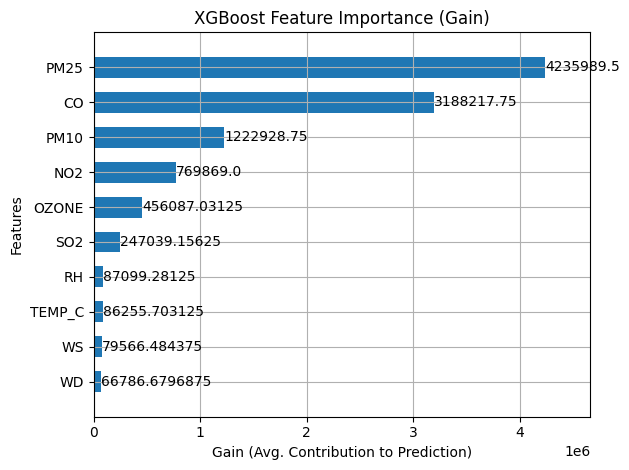

In [ ]:
xgb.plot_importance(model, importance_type='gain', xlabel='Gain (Avg. Contribution to Prediction)', height=0.6)
plt.title("XGBoost Feature Importance (Gain)")
plt.tight_layout()
plt.show()


In [ ]:
# Get feature importance as raw gain
importance_dict = model.get_booster().get_score(importance_type='gain')

# Convert to DataFrame
importances_df = pd.DataFrame.from_dict(importance_dict, orient='index', columns=['Gain'])

# Normalize to percentages
importances_df['Gain %'] = 100 * importances_df['Gain'] / importances_df['Gain'].sum()

# Sort by importance descending
importances_df = importances_df.sort_values('Gain %', ascending=False)

# Rename feature column for clarity
importances_df.index.name = 'Feature'
importances_df.reset_index(inplace=True)

print(importances_df.round(2))


  Feature        Gain  Gain %
0    PM25  4235989.50   40.58
1      CO  3188217.75   30.54
2    PM10  1222928.75   11.71
3     NO2   769869.00    7.37
4   OZONE   456087.03    4.37
5     SO2   247039.16    2.37
6      RH    87099.28    0.83
7  TEMP_C    86255.70    0.83
8      WS    79566.48    0.76
9      WD    66786.68    0.64


/tmp/ipython-input-21-3845123518.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


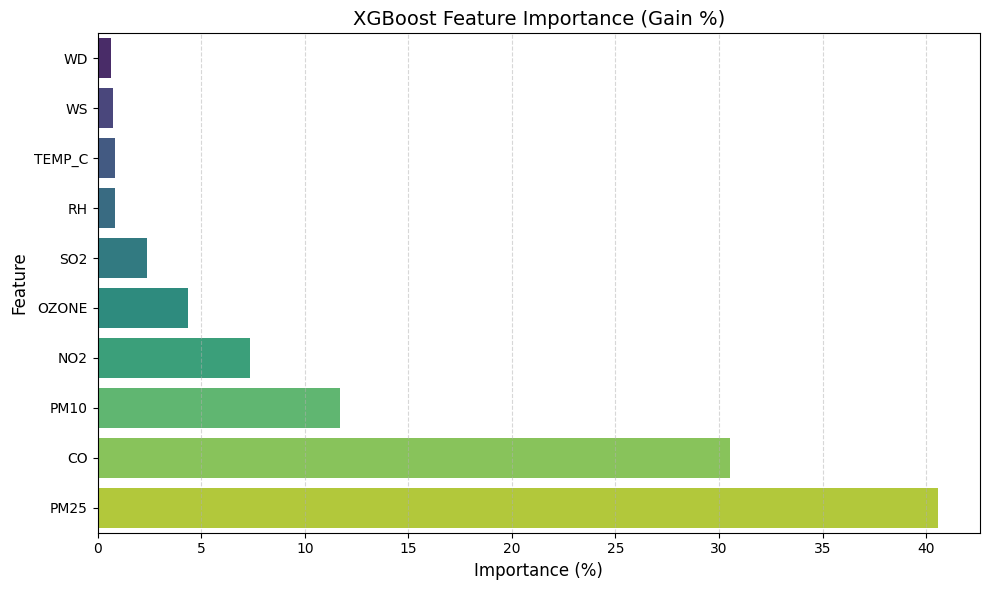

In [ ]:
'''import matplotlib.pyplot as plt
import seaborn as sns

# Sort features for better display
importances_df = importances_df.sort_values("Gain %", ascending=True)

plt.figure(figsize=(10, 6))
sns.barplot(
    x="Gain %",
    y="Feature",
    data=importances_df,
    palette="viridis"
)

plt.title("XGBoost Feature Importance (Gain %)", fontsize=14)
plt.xlabel("Importance (%)", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()

# === Save the plot ===
plt.savefig("xgboost_feature_importance.png", dpi=300, bbox_inches='tight')  # High-res
plt.show()'''


In [ ]:
'''from google.colab import files
files.download("xgboost_feature_importance.png")'''


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
33301/33301 ━━━━━━━━━━━━━━━━━━━━ 971s 29ms/step - loss: 0.0196 - val_loss: 0.0120
Epoch 2/10
33301/33301 ━━━━━━━━━━━━━━━━━━━━ 1006s 30ms/step - loss: 0.0181 - val_loss: 0.0118
Epoch 3/10
33301/33301 ━━━━━━━━━━━━━━━━━━━━ 985s 30ms/step - loss: 0.0171 - val_loss: 0.0125
Epoch 4/10
33301/33301 ━━━━━━━━━━━━━━━━━━━━ 1036s 29ms/step - loss: 0.0161 - val_loss: 0.0120
Epoch 5/10
33301/33301 ━━━━━━━━━━━━━━━━━━━━ 978s 29ms/step - loss: 0.0157 - val_loss: 0.0122
Epoch 6/10
33301/33301 ━━━━━━━━━━━━━━━━━━━━ 969s 29ms/step - loss: 0.0154 - val_loss: 0.0118
Epoch 7/10
33301/33301 ━━━━━━━━━━━━━━━━━━━━ 972s 29ms/step - loss: 0.0149 - val_loss: 0.0117
Epoch 8/10
33301/33301 ━━━━━━━━━━━━━━━━━━━━ 972s 29ms/step - loss: 0.0147 - val_loss: 0.0118
Epoch 9/10
33301/33301 ━━━━━━━━━━━━━━━━━━━━ 978s 29ms/step - loss: 0.0144 - val_loss: 0.0118
Epoch 10/10
33301/33301 ━━━━━━━━━━━━━━━━━━━━ 961s 29ms/step - loss: 0.0142 - val_loss: 0.0120
8326/8326 ━━━━━━━━━━━━━━━━━━━━ 71s 8ms/step
Test MSE: 0.0120


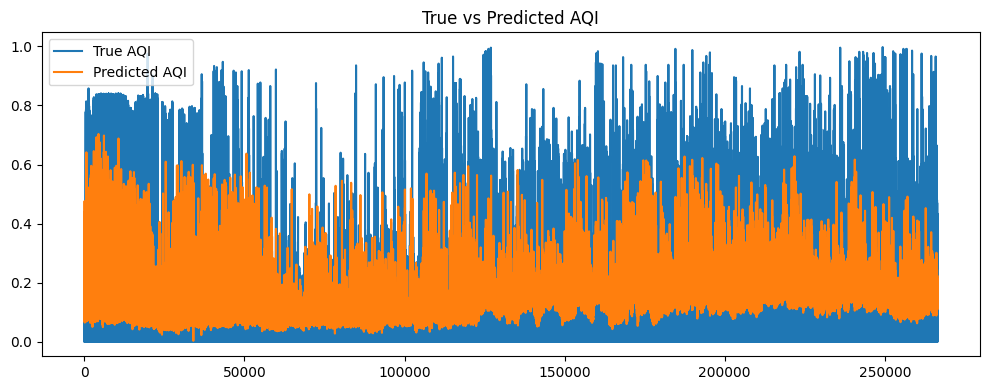

In [23]:
'''import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# ==== 1. Load & Prepare Data ====
top_features = ['PM25', 'CO', 'PM10', 'NO2', 'OZONE' , 'SO2']
target_col = 'AQI_CPCB'
df = df.sort_values('Start_TS')  # ensure time order

data = df[top_features + [target_col]].dropna().copy()

# ==== 2. Normalize ====
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# ==== 3. Create sequences ====
def create_sequences(data, seq_len):
    X, y = [], []
    for i in range(seq_len, len(data)):
        X.append(data[i-seq_len:i, :-1])  # all features except target
        y.append(data[i, -1])             # target column
    return np.array(X), np.array(y)

SEQ_LEN = 24  # past 24 hours
X, y = create_sequences(scaled_data, SEQ_LEN)

# ==== 4. Train/Test Split ====
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# ==== 5. Build LSTM Model ====
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(SEQ_LEN, len(top_features))),
    Dropout(0.2),
    LSTM(32),
    Dropout(0.2),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

# ==== 6. Train ====
history = model.fit(X_train, y_train, epochs=10, batch_size=32,
                    validation_data=(X_test, y_test), verbose=1)

# ==== 7. Evaluate ====
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Test MSE: {mse:.4f}")

# ==== 8. Plot ====
plt.figure(figsize=(10, 4))
plt.plot(y_test, label='True AQI')
plt.plot(y_pred, label='Predicted AQI')
plt.legend()
plt.title("True vs Predicted AQI")
plt.tight_layout()
plt.show()'''


In [25]:
'''from keras.saving import save_model
from google.colab import files  # Only needed in Colab

# Save the model
save_model(model, "lstm_aqi_model.keras")

# Download the file (Colab only)
files.download("lstm_aqi_model.keras")'''


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

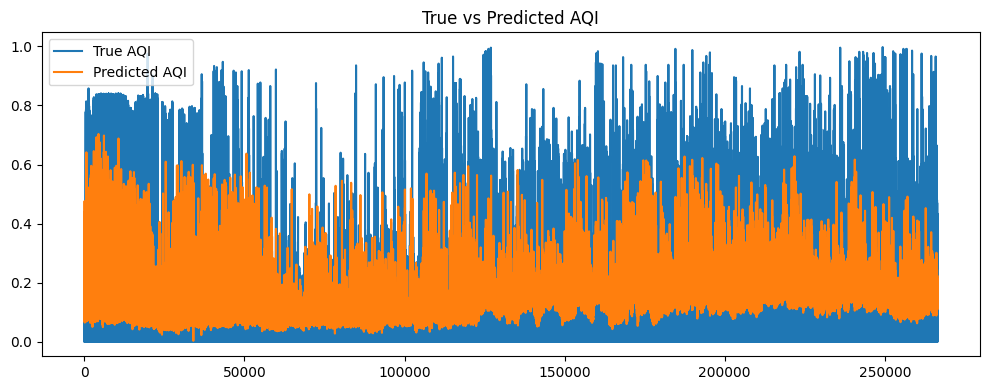

In [26]:
'''import matplotlib.pyplot as plt

# ==== 8. Plot and Save ====
plt.figure(figsize=(10, 4))
plt.plot(y_test, label='True AQI')
plt.plot(y_pred, label='Predicted AQI')
plt.legend()
plt.title("True vs Predicted AQI")
plt.tight_layout()

# Save the plot as PNG
plt.savefig("true_vs_predicted_aqi.png")

# Show the plot
plt.show()'''


In [27]:
'''from google.colab import files
files.download("true_vs_predicted_aqi.png")'''


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [28]:
!pip install optuna
!pip install mlflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.9/395.9 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.7/24.7 MB 34.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 60.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 676.2/676.2 kB 35.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.6/65.6 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.6/201.6 kB 10.1 MB/s eta 0:00:00


In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import lightgbm as lgb
import mlflow
import mlflow.lightgbm

# Selected features
feature_cols = [
    'AQI_CO', 'AQI_PM25', 'AQI_NO2', 'AQI_PM10',
    'NO2', 'PM25', 'NOX_TO_NO2', 'AQI_OZONE', 'PM10', 'CO',
    'Rolling_NO2_mean', 'Rolling_CO_mean', 'Rolling_PM10_mean'
]

# Target column
target_col = 'AQI_CPCB'

# Filter to features and target
X = df[feature_cols]
y = df[target_col]

# Impute missing values in features with median
print("Missing values before imputation:\n", X.isnull().sum())
X = X.fillna(X.median())
print("Missing values after imputation:\n", X.isnull().sum())

# Drop any rows with missing target values
data = pd.concat([X, y], axis=1).dropna()
X = data[feature_cols]
y = data[target_col]

print(f"Data shape after cleanup: {X.shape}")

# Train-test split
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42)

# LightGBM datasets
train_data = lgb.Dataset(X_train, label=y_train)
val_data = lgb.Dataset(X_val, label=y_val)

# LightGBM params
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'verbosity': -1,
    'boosting_type': 'gbdt',
    'seed': 42
}

# Prepare input example for MLflow model logging
input_example = X_val.iloc[:1]

# Start MLflow run
with mlflow.start_run(run_name="LightGBM Baseline with Median Impute"):
    # Log parameters
    mlflow.log_params(params)

    # Train model with callbacks
    model = lgb.train(
        params,
        train_data,
        valid_sets=[val_data],
        num_boost_round=1000,
        callbacks=[
            lgb.early_stopping(stopping_rounds=50),
            lgb.log_evaluation(period=50)
        ]
    )

    # Predict
    y_pred = model.predict(X_val, num_iteration=model.best_iteration)

    # Evaluate
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    mae = mean_absolute_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)
    mape = (abs((y_val - y_pred) / y_val.replace(0, 1))).mean() * 100

    # Log metrics
    mlflow.log_metrics({
        "RMSE": rmse,
        "MAE": mae,
        "R2": r2,
        "MAPE": mape
    })

    # Log model with input example
    mlflow.lightgbm.log_model(model, "model", input_example=input_example)

    print("\n✅ Evaluation Metrics:")
    print(f"RMSE : {rmse:.4f}")
    print(f"MAE  : {mae:.4f}")
    print(f"R²   : {r2:.4f}")
    print(f"MAPE : {mape:.2f}%")


Missing values before imputation:
 AQI_CO                49942
AQI_PM25              19202
AQI_NO2                6729
AQI_PM10              11131
NO2                       0
PM25                      0
NOX_TO_NO2           314220
AQI_OZONE              5219
PM10                      0
CO                        0
Rolling_NO2_mean          0
Rolling_CO_mean           0
Rolling_PM10_mean         0
dtype: int64
Missing values after imputation:
 AQI_CO               0
AQI_PM25             0
AQI_NO2              0
AQI_PM10             0
NO2                  0
PM25                 0
NOX_TO_NO2           0
AQI_OZONE            0
PM10                 0
CO                   0
Rolling_NO2_mean     0
Rolling_CO_mean      0
Rolling_PM10_mean    0
dtype: int64
Data shape after cleanup: (1332059, 13)
Training until validation scores don't improve for 50 rounds
[50]	valid_0's rmse: 7.12837
[100]	valid_0's rmse: 6.67109
[150]	valid_0's rmse: 6.45978
[200]	valid_0's rmse: 6.33901
[250]	valid_0's rmse: 

2025/07/17 21:22:30 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.



✅ Evaluation Metrics:
RMSE : 5.8978
MAE  : 1.7099
R²   : 0.9932
MAPE : 5.99%


In [31]:
import pandas as pd
import numpy as np
import lightgbm as lgb
import optuna
import mlflow
import mlflow.lightgbm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from mlflow.models.signature import infer_signature

# 1. Feature and Target Definitions (assumes `df` already exists)
feature_cols = [
    'AQI_CO', 'AQI_PM25', 'AQI_NO2', 'AQI_PM10',
    'NO2', 'PM25', 'NOX_TO_NO2', 'AQI_OZONE', 'PM10', 'CO',
    'Rolling_NO2_mean', 'Rolling_CO_mean', 'Rolling_PM10_mean'
]
target_col = 'AQI_CPCB'

# 2. Clean and split the dataset
X = df[feature_cols].fillna(df[feature_cols].median())
y = df[target_col]
data = pd.concat([X, y], axis=1).dropna()

X = data[feature_cols]
y = data[target_col]

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Define the Optuna objective
def objective(trial):
    params = {
        'objective': 'regression',
        'metric': 'rmse',
        'verbosity': -1,
        'boosting_type': 'gbdt',
        'learning_rate': trial.suggest_float('learning_rate', 1e-3, 0.3, log=True),
        'num_leaves': trial.suggest_int('num_leaves', 31, 2047),
        'max_depth': trial.suggest_int('max_depth', 4, 32),
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 10, 100),
        'lambda_l1': trial.suggest_float('lambda_l1', 1e-3, 10.0, log=True),
        'lambda_l2': trial.suggest_float('lambda_l2', 1e-3, 10.0, log=True),
        'feature_fraction': trial.suggest_float('feature_fraction', 0.5, 1.0),
        'bagging_fraction': trial.suggest_float('bagging_fraction', 0.5, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 10),
        'seed': 42
    }

    with mlflow.start_run(nested=True):
        mlflow.log_params(params)

        dtrain = lgb.Dataset(X_train, label=y_train)
        dvalid = lgb.Dataset(X_val, label=y_val)

        model = lgb.train(
            params,
            dtrain,
            valid_sets=[dvalid],
            num_boost_round=1000,
            callbacks=[
                lgb.early_stopping(stopping_rounds=50),
                lgb.log_evaluation(period=50)
            ]
        )

        y_pred = model.predict(X_val, num_iteration=model.best_iteration)
        rmse = np.sqrt(mean_squared_error(y_val, y_pred))
        mae = mean_absolute_error(y_val, y_pred)
        r2 = r2_score(y_val, y_pred)
        y_val_safe = y_val.replace(0, 1)
        mape = np.mean(np.abs((y_val - y_pred) / y_val_safe)) * 100

        mlflow.log_metric("rmse", rmse)
        mlflow.log_metric("mae", mae)
        mlflow.log_metric("r2", r2)
        mlflow.log_metric("mape", mape)

        return rmse

# 4. Run Optuna study
study = optuna.create_study(direction="minimize")
with mlflow.start_run(run_name="Optuna_LightGBM_Tuning") as run:
    study.optimize(objective, n_trials=10)

    # 5. Train best model from study
    best_params = study.best_params
    best_params.update({
        'objective': 'regression',
        'metric': 'rmse',
        'boosting_type': 'gbdt',
        'verbosity': -1,
        'seed': 42
    })

    dtrain = lgb.Dataset(X_train, label=y_train)
    dvalid = lgb.Dataset(X_val, label=y_val)

    best_model = lgb.train(
        best_params,
        dtrain,
        valid_sets=[dvalid],
        num_boost_round=1000,
        callbacks=[
            lgb.early_stopping(stopping_rounds=50),
            lgb.log_evaluation(period=50)
        ]
    )

    y_pred = best_model.predict(X_val, num_iteration=best_model.best_iteration)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    mae = mean_absolute_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)
    y_val_safe = y_val.replace(0, 1)
    mape = np.mean(np.abs((y_val - y_pred) / y_val_safe)) * 100

    mlflow.log_metrics({
        "final_rmse": rmse,
        "final_mae": mae,
        "final_r2": r2,
        "final_mape": mape
    })

    signature = infer_signature(X_val, y_pred)
    mlflow.lightgbm.log_model(
        best_model,
        "model",
        signature=signature,
        input_example=X_val.head(2)
    )

# 6. Print best result
print("\n🎯 Best trial results:")
print(f"Best RMSE: {study.best_value:.4f}")
print("Best Parameters:")
for k, v in study.best_params.items():
    print(f"  {k}: {v}")


[I 2025-07-17 21:28:01,979] A new study created in memory with name: no-name-421fba13-772a-4020-8e5f-c4ea54f45d06


Training until validation scores don't improve for 50 rounds
[50]	valid_0's rmse: 57.8784
[100]	valid_0's rmse: 47.0454
[150]	valid_0's rmse: 38.3415
[200]	valid_0's rmse: 31.3507
[250]	valid_0's rmse: 25.7675
[300]	valid_0's rmse: 21.3273
[350]	valid_0's rmse: 17.8026
[400]	valid_0's rmse: 15.0503
[450]	valid_0's rmse: 12.9145
[500]	valid_0's rmse: 11.2906
[550]	valid_0's rmse: 10.0584
[600]	valid_0's rmse: 9.1544
[650]	valid_0's rmse: 8.50211
[700]	valid_0's rmse: 8.03076
[750]	valid_0's rmse: 7.69147
[800]	valid_0's rmse: 7.43616
[850]	valid_0's rmse: 7.24026
[900]	valid_0's rmse: 7.09844
[950]	valid_0's rmse: 6.9718
[1000]	valid_0's rmse: 6.88348
Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 6.88348


[I 2025-07-17 21:33:45,964] Trial 0 finished with value: 6.883475354286368 and parameters: {'learning_rate': 0.0043018050012701555, 'num_leaves': 810, 'max_depth': 9, 'min_data_in_leaf': 29, 'lambda_l1': 0.0025583069070315733, 'lambda_l2': 0.07570520409823728, 'feature_fraction': 0.9018274803166679, 'bagging_fraction': 0.9024563827933768, 'bagging_freq': 7}. Best is trial 0 with value: 6.883475354286368.


Training until validation scores don't improve for 50 rounds
[50]	valid_0's rmse: 27.8454
[100]	valid_0's rmse: 12.2244
[150]	valid_0's rmse: 7.56458
[200]	valid_0's rmse: 6.48573
[250]	valid_0's rmse: 6.19507
[300]	valid_0's rmse: 6.05598
[350]	valid_0's rmse: 5.97602
[400]	valid_0's rmse: 5.92559
[450]	valid_0's rmse: 5.89171
[500]	valid_0's rmse: 5.86497
[550]	valid_0's rmse: 5.84614
[600]	valid_0's rmse: 5.83333
[650]	valid_0's rmse: 5.8195
[700]	valid_0's rmse: 5.81171
[750]	valid_0's rmse: 5.80367
[800]	valid_0's rmse: 5.79781
[850]	valid_0's rmse: 5.7884
[900]	valid_0's rmse: 5.78634
[950]	valid_0's rmse: 5.78411
[1000]	valid_0's rmse: 5.77999
Did not meet early stopping. Best iteration is:
[990]	valid_0's rmse: 5.77989


[I 2025-07-17 21:44:17,035] Trial 1 finished with value: 5.779889604364014 and parameters: {'learning_rate': 0.019441889009495675, 'num_leaves': 843, 'max_depth': 23, 'min_data_in_leaf': 57, 'lambda_l1': 0.34764957462656026, 'lambda_l2': 0.025683287618678004, 'feature_fraction': 0.82725183139095, 'bagging_fraction': 0.5656402337445862, 'bagging_freq': 9}. Best is trial 1 with value: 5.779889604364014.


Training until validation scores don't improve for 50 rounds
[50]	valid_0's rmse: 67.5927
[100]	valid_0's rmse: 64.0069
[150]	valid_0's rmse: 60.6095
[200]	valid_0's rmse: 57.4414
[250]	valid_0's rmse: 54.4579
[300]	valid_0's rmse: 51.6511
[350]	valid_0's rmse: 48.9736
[400]	valid_0's rmse: 46.4596
[450]	valid_0's rmse: 44.0292
[500]	valid_0's rmse: 41.7707
[550]	valid_0's rmse: 39.6097
[600]	valid_0's rmse: 37.6125
[650]	valid_0's rmse: 35.7412
[700]	valid_0's rmse: 33.956
[750]	valid_0's rmse: 32.2379
[800]	valid_0's rmse: 30.636
[850]	valid_0's rmse: 29.1382
[900]	valid_0's rmse: 27.727
[950]	valid_0's rmse: 26.3823
[1000]	valid_0's rmse: 25.1271
Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 25.1271


[I 2025-07-17 21:52:07,293] Trial 2 finished with value: 25.127068675552053 and parameters: {'learning_rate': 0.0011649943040590123, 'num_leaves': 445, 'max_depth': 22, 'min_data_in_leaf': 20, 'lambda_l1': 0.25455029549311237, 'lambda_l2': 7.272813516042065, 'feature_fraction': 0.6502942266834506, 'bagging_fraction': 0.8496573608192759, 'bagging_freq': 9}. Best is trial 1 with value: 5.779889604364014.


Training until validation scores don't improve for 50 rounds
[50]	valid_0's rmse: 9.29877
[100]	valid_0's rmse: 7.22841
[150]	valid_0's rmse: 6.797
[200]	valid_0's rmse: 6.49616
[250]	valid_0's rmse: 6.35412
[300]	valid_0's rmse: 6.26182
[350]	valid_0's rmse: 6.19972
[400]	valid_0's rmse: 6.16249
[450]	valid_0's rmse: 6.11914
[500]	valid_0's rmse: 6.09567
[550]	valid_0's rmse: 6.07172
[600]	valid_0's rmse: 6.05593
[650]	valid_0's rmse: 6.04443
[700]	valid_0's rmse: 6.03283
[750]	valid_0's rmse: 6.02203
[800]	valid_0's rmse: 6.01043
[850]	valid_0's rmse: 6.00067
[900]	valid_0's rmse: 5.99348
[950]	valid_0's rmse: 5.98709
[1000]	valid_0's rmse: 5.983
Did not meet early stopping. Best iteration is:
[997]	valid_0's rmse: 5.98297


[I 2025-07-17 21:55:49,882] Trial 3 finished with value: 5.982971806708374 and parameters: {'learning_rate': 0.06255181390233676, 'num_leaves': 1621, 'max_depth': 9, 'min_data_in_leaf': 16, 'lambda_l1': 0.15575040403696622, 'lambda_l2': 0.015161406352133693, 'feature_fraction': 0.5743513914977519, 'bagging_fraction': 0.9897285055494435, 'bagging_freq': 1}. Best is trial 1 with value: 5.779889604364014.


Training until validation scores don't improve for 50 rounds
[50]	valid_0's rmse: 8.27964
[100]	valid_0's rmse: 7.23648
[150]	valid_0's rmse: 6.88133
[200]	valid_0's rmse: 6.69503
[250]	valid_0's rmse: 6.59245
[300]	valid_0's rmse: 6.51835
[350]	valid_0's rmse: 6.4586
[400]	valid_0's rmse: 6.4221
[450]	valid_0's rmse: 6.38742
[500]	valid_0's rmse: 6.35682
[550]	valid_0's rmse: 6.33119
[600]	valid_0's rmse: 6.31044
[650]	valid_0's rmse: 6.29238
[700]	valid_0's rmse: 6.27414
[750]	valid_0's rmse: 6.26045
[800]	valid_0's rmse: 6.24241
[850]	valid_0's rmse: 6.22942
[900]	valid_0's rmse: 6.21663
[950]	valid_0's rmse: 6.20497
[1000]	valid_0's rmse: 6.19694
Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 6.19694


[I 2025-07-17 21:59:56,381] Trial 4 finished with value: 6.196938294029928 and parameters: {'learning_rate': 0.0931891356090384, 'num_leaves': 342, 'max_depth': 8, 'min_data_in_leaf': 93, 'lambda_l1': 0.17298388097210665, 'lambda_l2': 0.015712806757980202, 'feature_fraction': 0.5437104236611743, 'bagging_fraction': 0.7295618458132124, 'bagging_freq': 2}. Best is trial 1 with value: 5.779889604364014.


Training until validation scores don't improve for 50 rounds
[50]	valid_0's rmse: 8.02375
[100]	valid_0's rmse: 6.5216
[150]	valid_0's rmse: 6.37094
[200]	valid_0's rmse: 6.3278
[250]	valid_0's rmse: 6.3072
[300]	valid_0's rmse: 6.3041
Early stopping, best iteration is:
[260]	valid_0's rmse: 6.30281


[I 2025-07-17 22:02:55,175] Trial 5 finished with value: 6.302814805101348 and parameters: {'learning_rate': 0.06298144875460934, 'num_leaves': 1960, 'max_depth': 25, 'min_data_in_leaf': 11, 'lambda_l1': 1.2115909536413279, 'lambda_l2': 0.006687565932830208, 'feature_fraction': 0.6385581573108876, 'bagging_fraction': 0.5462270843229231, 'bagging_freq': 5}. Best is trial 1 with value: 5.779889604364014.


Training until validation scores don't improve for 50 rounds
[50]	valid_0's rmse: 67.1092
[100]	valid_0's rmse: 63.1743
[150]	valid_0's rmse: 59.4889
[200]	valid_0's rmse: 56.0398
[250]	valid_0's rmse: 52.8203
[300]	valid_0's rmse: 49.8017
[350]	valid_0's rmse: 46.9468
[400]	valid_0's rmse: 44.2859
[450]	valid_0's rmse: 41.7927
[500]	valid_0's rmse: 39.4589
[550]	valid_0's rmse: 37.276
[600]	valid_0's rmse: 35.221
[650]	valid_0's rmse: 33.2974
[700]	valid_0's rmse: 31.5041
[750]	valid_0's rmse: 29.8179
[800]	valid_0's rmse: 28.2418
[850]	valid_0's rmse: 26.7656
[900]	valid_0's rmse: 25.3766
[950]	valid_0's rmse: 24.0719
[1000]	valid_0's rmse: 22.86
Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 22.86


[I 2025-07-17 22:06:23,102] Trial 6 finished with value: 22.860032705211598 and parameters: {'learning_rate': 0.0013113398301693709, 'num_leaves': 1383, 'max_depth': 6, 'min_data_in_leaf': 18, 'lambda_l1': 0.19111534922714615, 'lambda_l2': 5.59592988758931, 'feature_fraction': 0.9095585976624492, 'bagging_fraction': 0.7128547368691992, 'bagging_freq': 7}. Best is trial 1 with value: 5.779889604364014.


Training until validation scores don't improve for 50 rounds
[50]	valid_0's rmse: 65.9068
[100]	valid_0's rmse: 60.9446
[150]	valid_0's rmse: 56.3892
[200]	valid_0's rmse: 52.2093
[250]	valid_0's rmse: 48.3676
[300]	valid_0's rmse: 44.8333
[350]	valid_0's rmse: 41.573
[400]	valid_0's rmse: 38.5929
[450]	valid_0's rmse: 35.844
[500]	valid_0's rmse: 33.3213
[550]	valid_0's rmse: 31.0007
[600]	valid_0's rmse: 28.8772
[650]	valid_0's rmse: 26.9247
[700]	valid_0's rmse: 25.1242
[750]	valid_0's rmse: 23.472
[800]	valid_0's rmse: 21.9474
[850]	valid_0's rmse: 20.543
[900]	valid_0's rmse: 19.2561
[950]	valid_0's rmse: 18.0729
[1000]	valid_0's rmse: 16.9939
Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 16.9939


[I 2025-07-17 22:09:29,042] Trial 7 finished with value: 16.993876374194905 and parameters: {'learning_rate': 0.0016983344631538457, 'num_leaves': 1095, 'max_depth': 6, 'min_data_in_leaf': 72, 'lambda_l1': 4.267173437357039, 'lambda_l2': 1.6496411130728428, 'feature_fraction': 0.9580420389909244, 'bagging_fraction': 0.6530608399086327, 'bagging_freq': 1}. Best is trial 1 with value: 5.779889604364014.


Training until validation scores don't improve for 50 rounds
[50]	valid_0's rmse: 46.1529
[100]	valid_0's rmse: 30.1537
[150]	valid_0's rmse: 20.1522
[200]	valid_0's rmse: 14.0736
[250]	valid_0's rmse: 10.5682
[300]	valid_0's rmse: 8.65407
[350]	valid_0's rmse: 7.62995
[400]	valid_0's rmse: 7.03683
[450]	valid_0's rmse: 6.7024
[500]	valid_0's rmse: 6.52156
[550]	valid_0's rmse: 6.40319
[600]	valid_0's rmse: 6.29894
[650]	valid_0's rmse: 6.2215
[700]	valid_0's rmse: 6.16682
[750]	valid_0's rmse: 6.1291
[800]	valid_0's rmse: 6.09598
[850]	valid_0's rmse: 6.07085
[900]	valid_0's rmse: 6.04291
[950]	valid_0's rmse: 6.02077
[1000]	valid_0's rmse: 6.00019
Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 6.00019


[I 2025-07-17 22:16:42,097] Trial 8 finished with value: 6.000192085594251 and parameters: {'learning_rate': 0.008897892430642845, 'num_leaves': 397, 'max_depth': 12, 'min_data_in_leaf': 46, 'lambda_l1': 0.03915312288908949, 'lambda_l2': 0.3996991930499918, 'feature_fraction': 0.9506867630771445, 'bagging_fraction': 0.7924959086018029, 'bagging_freq': 4}. Best is trial 1 with value: 5.779889604364014.


Training until validation scores don't improve for 50 rounds
[50]	valid_0's rmse: 8.00908
[100]	valid_0's rmse: 6.69368
[150]	valid_0's rmse: 6.37579
[200]	valid_0's rmse: 6.23713
[250]	valid_0's rmse: 6.16763
[300]	valid_0's rmse: 6.12771
[350]	valid_0's rmse: 6.09258
[400]	valid_0's rmse: 6.06846
[450]	valid_0's rmse: 6.04624
[500]	valid_0's rmse: 6.02932
[550]	valid_0's rmse: 6.01297
[600]	valid_0's rmse: 6.00115
[650]	valid_0's rmse: 5.98975
[700]	valid_0's rmse: 5.97789
[750]	valid_0's rmse: 5.9678
[800]	valid_0's rmse: 5.95937
[850]	valid_0's rmse: 5.95416
[900]	valid_0's rmse: 5.94872
[950]	valid_0's rmse: 5.94408
[1000]	valid_0's rmse: 5.9413
Did not meet early stopping. Best iteration is:
[990]	valid_0's rmse: 5.94118


[I 2025-07-17 22:21:23,627] Trial 9 finished with value: 5.941183207720773 and parameters: {'learning_rate': 0.062307537027434294, 'num_leaves': 864, 'max_depth': 9, 'min_data_in_leaf': 57, 'lambda_l1': 0.040876968409669576, 'lambda_l2': 0.24563369141496588, 'feature_fraction': 0.8350245901567186, 'bagging_fraction': 0.692230441107409, 'bagging_freq': 3}. Best is trial 1 with value: 5.779889604364014.


Training until validation scores don't improve for 50 rounds
[50]	valid_0's rmse: 27.8454
[100]	valid_0's rmse: 12.2244
[150]	valid_0's rmse: 7.56458
[200]	valid_0's rmse: 6.48573
[250]	valid_0's rmse: 6.19507
[300]	valid_0's rmse: 6.05598
[350]	valid_0's rmse: 5.97602
[400]	valid_0's rmse: 5.92559
[450]	valid_0's rmse: 5.89171
[500]	valid_0's rmse: 5.86497
[550]	valid_0's rmse: 5.84614
[600]	valid_0's rmse: 5.83333
[650]	valid_0's rmse: 5.8195
[700]	valid_0's rmse: 5.81171
[750]	valid_0's rmse: 5.80367
[800]	valid_0's rmse: 5.79781
[850]	valid_0's rmse: 5.7884
[900]	valid_0's rmse: 5.78634
[950]	valid_0's rmse: 5.78411
[1000]	valid_0's rmse: 5.77999
Did not meet early stopping. Best iteration is:
[990]	valid_0's rmse: 5.77989


2025/07/17 22:31:56 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.



🎯 Best trial results:
Best RMSE: 5.7799
Best Parameters:
  learning_rate: 0.019441889009495675
  num_leaves: 843
  max_depth: 23
  min_data_in_leaf: 57
  lambda_l1: 0.34764957462656026
  lambda_l2: 0.025683287618678004
  feature_fraction: 0.82725183139095
  bagging_fraction: 0.5656402337445862
  bagging_freq: 9


In [32]:
# ✅ Final Model Training using Best Parameters from Optuna
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from mlflow.models.signature import infer_signature
import mlflow
import mlflow.lightgbm
import numpy as np
best_params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    'verbosity': -1,
    'seed': 42,
    'learning_rate': 0.019441889009495675,
    'num_leaves': 843,
    'max_depth': 23,
    'min_data_in_leaf': 57,
    'lambda_l1': 0.34764957462656026,
    'lambda_l2': 0.025683287618678004,
    'feature_fraction': 0.82725183139095,
    'bagging_fraction': 0.5656402337445862,
    'bagging_freq': 9
}

with mlflow.start_run(run_name="FinalModel_OptunaBestParams"):
    dtrain = lgb.Dataset(X_train, label=y_train)
    dvalid = lgb.Dataset(X_val, label=y_val)

    model = lgb.train(
        best_params,
        dtrain,
        valid_sets=[dvalid],
        num_boost_round=1000,
        callbacks=[
            lgb.early_stopping(stopping_rounds=50),
            lgb.log_evaluation(period=50)
        ]
    )

    y_pred = model.predict(X_val, num_iteration=model.best_iteration)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    mae = mean_absolute_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)
    mape = np.mean(np.abs((y_val - y_pred) / y_val.replace(0, 1))) * 100

    # Log metrics and model
    mlflow.log_metrics({
        "final_rmse": rmse,
        "final_mae": mae,
        "final_r2": r2,
        "final_mape": mape
    })

    mlflow.lightgbm.log_model(
        model,
        "model",
        signature=infer_signature(X_val, y_pred),
        input_example=X_val.head(2)
    )

    # Print results
    print("\n✅ Final Model Evaluation:")
    print(f"Best RMSE : {rmse:.4f}")
    print(f"MAE       : {mae:.4f}")
    print(f"R²        : {r2:.4f}")
    print(f"MAPE      : {mape:.2f}%")


Training until validation scores don't improve for 50 rounds
[50]	valid_0's rmse: 27.8454
[100]	valid_0's rmse: 12.2244
[150]	valid_0's rmse: 7.56458
[200]	valid_0's rmse: 6.48573
[250]	valid_0's rmse: 6.19507
[300]	valid_0's rmse: 6.05598
[350]	valid_0's rmse: 5.97602
[400]	valid_0's rmse: 5.92559
[450]	valid_0's rmse: 5.89171
[500]	valid_0's rmse: 5.86497
[550]	valid_0's rmse: 5.84614
[600]	valid_0's rmse: 5.83333
[650]	valid_0's rmse: 5.8195
[700]	valid_0's rmse: 5.81171
[750]	valid_0's rmse: 5.80367
[800]	valid_0's rmse: 5.79781
[850]	valid_0's rmse: 5.7884
[900]	valid_0's rmse: 5.78634
[950]	valid_0's rmse: 5.78411
[1000]	valid_0's rmse: 5.77999
Did not meet early stopping. Best iteration is:
[990]	valid_0's rmse: 5.77989


2025/07/17 22:43:59 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.



✅ Final Model Evaluation:
Best RMSE : 5.7799
MAE       : 1.4926
R²        : 0.9934
MAPE      : 5.11%


In [33]:
# Check unique categories and their counts
print("Unique AQI categories and counts:")
print(df['AQI_Category'].value_counts(dropna=False))

# Check for null values
null_count = df['AQI_Category'].isnull().sum()
print(f"\nNumber of null values in AQI_Category: {null_count}")

# Basic info about the column
print(f"\nTotal rows in AQI_Category column: {len(df['AQI_Category'])}")
print(f"Non-null rows: {df['AQI_Category'].notnull().sum()}")


Unique AQI categories and counts:
AQI_Category
Good            702353
Satisfactory    395049
Moderate        176300
Poor             24184
Very Poor        20623
Severe           13550
Name: count, dtype: int64

Number of null values in AQI_Category: 0

Total rows in AQI_Category column: 1332059
Non-null rows: 1332059


In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import lightgbm as lgb
import mlflow
import mlflow.lightgbm
from mlflow.models.signature import infer_signature
import joblib
import os
from google.colab import files

# 1. Define features and target
feature_cols = [
    'AQI_CO', 'AQI_PM25', 'AQI_NO2', 'AQI_PM10',
    'NO2', 'PM25', 'NOX_TO_NO2', 'AQI_OZONE', 'PM10', 'CO',
    'Rolling_NO2_mean', 'Rolling_CO_mean', 'Rolling_PM10_mean'
]
target_col = 'AQI_Category'

# 2. Prepare dataset
X = df[feature_cols].fillna(df[feature_cols].median())
y = df[target_col]

# Remove rows with missing target values
data = pd.concat([X, y], axis=1).dropna()
X = data[feature_cols]
y = data[target_col]

# 3. Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# 4. Split data
X_train, X_val, y_train, y_val = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# 5. Prepare LightGBM Datasets
train_data = lgb.Dataset(X_train, label=y_train)
val_data = lgb.Dataset(X_val, label=y_val)

# 6. LightGBM parameters
params = {
    'objective': 'multiclass',
    'num_class': len(le.classes_),
    'metric': 'multi_logloss',
    'verbosity': -1,
    'boosting_type': 'gbdt',
    'seed': 42
}

# 7. MLflow tracking
with mlflow.start_run(run_name="LightGBM AQI Category Classifier"):

    mlflow.log_params(params)

    model = lgb.train(
        params,
        train_data,
        valid_sets=[val_data],
        num_boost_round=1000,
        callbacks=[
            lgb.early_stopping(stopping_rounds=50),
            lgb.log_evaluation(period=10)
        ]
    )

    # Predict on validation set
    y_pred_probs = model.predict(X_val, num_iteration=model.best_iteration)
    y_pred = np.argmax(y_pred_probs, axis=1)

    # Evaluate
    accuracy = accuracy_score(y_val, y_pred)
    report = classification_report(y_val, y_pred, target_names=le.classes_)
    conf_matrix = confusion_matrix(y_val, y_pred)

    # Log accuracy
    mlflow.log_metric("accuracy", accuracy)

    # Log model with input_example and signature
    input_example = X_val.head(2)
    signature = infer_signature(X_val, y_pred_probs)
    mlflow.lightgbm.log_model(
        model,
        "model",
        input_example=input_example,
        signature=signature
    )

    print("\n✅ Classification Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print("\nClassification Report:\n", report)
    print("\nConfusion Matrix:\n", conf_matrix)

    # Save LabelEncoder locally in Colab
    encoder_path = "label_encoder.pkl"
    joblib.dump(le, encoder_path)
    print(f"\n📦 LabelEncoder saved as: {encoder_path}")

    # Trigger file download
    files.download(encoder_path)


Training until validation scores don't improve for 50 rounds
[10]	valid_0's multi_logloss: 0.167022
[20]	valid_0's multi_logloss: 0.0640787
[30]	valid_0's multi_logloss: 0.0450518
[40]	valid_0's multi_logloss: 0.0403925
[50]	valid_0's multi_logloss: 0.0386868
[60]	valid_0's multi_logloss: 0.0378708
[70]	valid_0's multi_logloss: 0.045222
[80]	valid_0's multi_logloss: 0.0541655
[90]	valid_0's multi_logloss: 0.0674697
[100]	valid_0's multi_logloss: 0.0664285
[110]	valid_0's multi_logloss: 0.101703
Early stopping, best iteration is:
[60]	valid_0's multi_logloss: 0.0378708


2025/07/17 22:47:57 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.



✅ Classification Metrics:
Accuracy: 0.9893

Classification Report:
               precision    recall  f1-score   support

        Good       0.99      1.00      0.99    140471
    Moderate       0.99      0.97      0.98     35260
        Poor       0.97      0.93      0.95      4837
Satisfactory       0.99      0.99      0.99     79010
      Severe       0.98      0.98      0.98      2710
   Very Poor       0.97      0.97      0.97      4124

    accuracy                           0.99    266412
   macro avg       0.98      0.97      0.98    266412
weighted avg       0.99      0.99      0.99    266412


Confusion Matrix:
 [[140325     64      0     82      0      0]
 [   635  34169     70    381      0      5]
 [     0    257   4522      0      1     57]
 [   978    154      0  77878      0      0]
 [     0      0      6      0   2647     57]
 [     0     10     61      0     44   4009]]

📦 LabelEncoder saved as: label_encoder.pkl


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [45]:
import joblib

# Save to Colab's local filesystem
joblib.dump(best_model, "LightGBM_AQI_Regression.pkl")

# Download it to your system
from google.colab import files
files.download("LightGBM_AQI_Regression.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [46]:
import joblib
from google.colab import files

# Save model in Colab's local environment
classifier_model_path = "LightGBM_AQI_Classifier.pkl"
joblib.dump(model, classifier_model_path)

# Download the saved model to your PC
files.download(classifier_model_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [47]:
import joblib
from google.colab import files

# Save model in Colab's local environment
classifier_model_path = "LightGBM_AQI_Classifier.pkl"
joblib.dump(model, classifier_model_path)

# Download the saved model to your PC
files.download(classifier_model_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [52]:
def print_latest_mlflow_run(experiment_name="Default"):
    from mlflow.tracking import MlflowClient
    from datetime import datetime

    client = MlflowClient()
    experiment = client.get_experiment_by_name(experiment_name)

    if experiment is None:
        print(f"❌ No experiment named '{experiment_name}' found.")
        return

    runs = client.search_runs(
        experiment_ids=[experiment.experiment_id],
        order_by=["start_time DESC"],
        max_results=1
    )

    if not runs:
        print(f"❌ No runs found in the '{experiment_name}' experiment.")
        return

    latest_run = runs[0]
    print(f"\n🔍 Experiment Name: {experiment.name}")
    print("📦 Latest MLflow Run ID:", latest_run.info.run_id)

    print("\n✅ MLflow Logged Metrics:")
    for key, value in latest_run.data.metrics.items():
        print(f"{key} : {value:.4f}")

    print("\n✅ MLflow Logged Parameters:")
    for key, value in latest_run.data.params.items():
        print(f"{key} : {value}")

    start = datetime.fromtimestamp(latest_run.info.start_time / 1000)
    print("🕒 Run started at:", start.strftime('%Y-%m-%d %H:%M:%S'))


In [53]:
from mlflow.tracking import MlflowClient

client = MlflowClient()
experiment = client.get_experiment_by_name("Default")
latest_run = client.search_runs(
    experiment_ids=[experiment.experiment_id],
    order_by=["start_time DESC"],
    max_results=1
)[0]

# List artifacts
artifacts = client.list_artifacts(latest_run.info.run_id)
for item in artifacts:
    print(f"📁 {item.path} ({item.file_size} bytes)")


In [54]:
    print("\n📁 Artifacts Logged:")
    artifacts = client.list_artifacts(latest_run.info.run_id)
    for artifact in artifacts:
        print(f"- {artifact.path}")



📁 Artifacts Logged:


In [55]:
print("✅ All models trained & saved successfully! 🚀 You're all set.\n🎯 Next step: Build the interactive App using DASH 🖥️🌿")


✅ All models trained & saved successfully! 🚀 You're all set.
🎯 Next step: Build the interactive App using DASH 🖥️🌿
